In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
studentInfo = pd.read_csv("studentInfo.csv")
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [3]:
gender = studentInfo.groupby(['gender'], as_index= False)
gender_count = gender['id_student'].count()
gender_count

,gender,id_student
0,F,14718
1,M,17875


In [4]:
studentVle = pd.read_csv('studentVle.csv')
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [5]:
demo_click = pd.merge(studentInfo,studentVle , on = ['id_student','code_module','code_presentation'], how = 'left')
demo_click

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546669.0,-5.0,16.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546662.0,-5.0,44.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652.0,-5.0,1.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546668.0,-5.0,2.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652.0,-5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658640,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896961.0,205.0,13.0
10658641,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896959.0,205.0,2.0
10658642,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896943.0,219.0,1.0
10658643,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896961.0,219.0,31.0


## Number of click vs Gender

<AxesSubplot:xlabel='gender'>

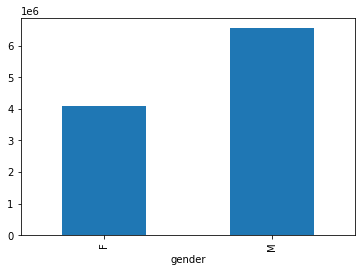

In [6]:
demo_click.groupby('gender')['sum_click'].count().plot(kind='bar')

In [8]:
female = demo_click.loc[demo_click['gender'] == 'F']
male = demo_click.loc[demo_click['gender'] == 'M']

## Number of clicks by gender vs date

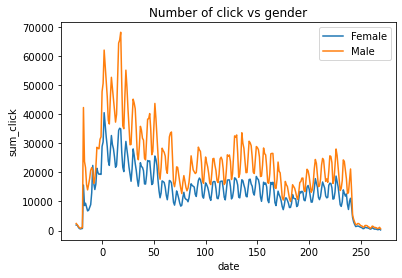

In [22]:
female.groupby('date')['sum_click'].count().plot(kind='line')
male.groupby('date')['sum_click'].count().plot(kind='line')
plt.xlabel('date')
plt.ylabel('sum_click')
plt.title('Number of click vs gender')
plt.legend(['Female', 'Male'])
#plt.rcParams["figure.figsize"] = (8,6)
plt.show()

##  Number of click vs region

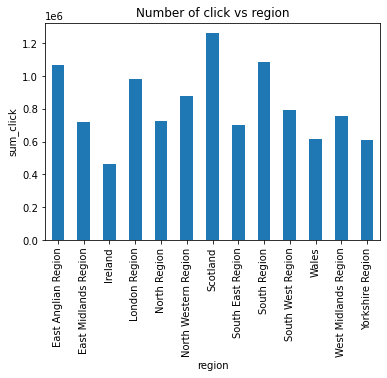

In [10]:
demo_click.groupby('region')['sum_click'].count().plot(kind='bar')
plt.xlabel('region')
plt.ylabel('sum_click')
plt.title('Number of click vs region')
plt.show()

## Number of clicks vs imd_band (Multiple deprivation index)
A measure of poverty of small areas. 

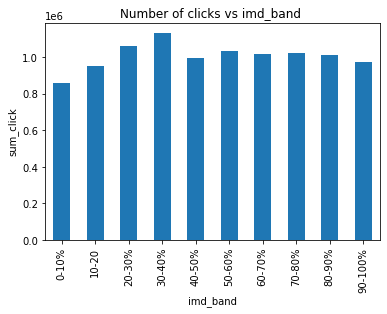

In [11]:
demo_click.groupby('imd_band')['sum_click'].count().plot(kind='bar')
plt.xlabel('imd_band')
plt.ylabel('sum_click')
plt.title('Number of clicks vs imd_band ')
plt.show()

## Number of clicks vs highest education

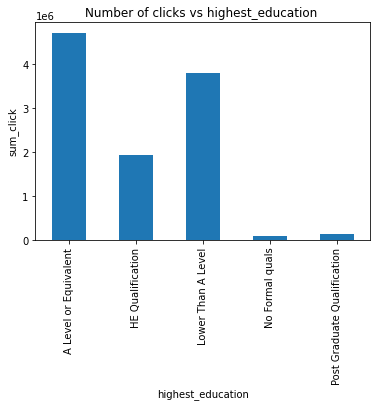

In [12]:
demo_click.groupby('highest_education')['sum_click'].count().plot(kind="bar")
plt.xlabel('highest_education')
plt.ylabel('sum_click')
plt.title('Number of clicks vs highest_education ')
plt.show()

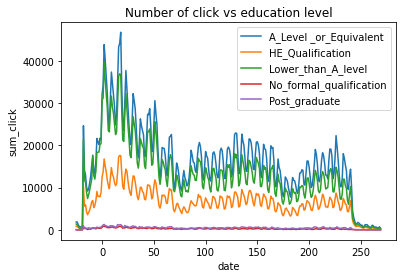

In [13]:
A_Level_or_Equivalent = demo_click.loc[demo_click['highest_education'] == 'A Level or Equivalent']
HE_Qualification = demo_click.loc[demo_click['highest_education'] == 'HE Qualification']
Lower_than_A_level = demo_click.loc[demo_click['highest_education'] == 'Lower Than A Level']
No_formal_qualification = demo_click.loc[demo_click['highest_education'] == 'No Formal quals']
Post_graduate = demo_click.loc[demo_click['highest_education'] == 'Post Graduate Qualification']


A_Level_or_Equivalent.groupby('date')['sum_click'].count().plot(kind="line")
HE_Qualification.groupby('date')['sum_click'].count().plot(kind='line')
Lower_than_A_level.groupby('date')['sum_click'].count().plot(kind='line')
No_formal_qualification.groupby('date')['sum_click'].count().plot(kind='line')
Post_graduate.groupby('date')['sum_click'].count().plot(kind='line')

plt.xlabel('date')
plt.ylabel('sum_click')
plt.title('Number of click vs education level')
plt.legend(['A_Level _or_Equivalent', 'HE_Qualification','Lower_than_A_level','No_formal_qualification','Post_graduate'])
#plt.rcParams["figure.figsize"] = (8,6)
plt.show()

##  click vs age_band

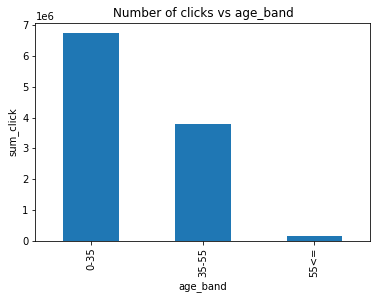

In [14]:
demo_click.groupby('age_band')['sum_click'].count().plot(kind="bar")
plt.xlabel('age_band')
plt.ylabel('sum_click')
plt.title('Number of clicks vs age_band')
plt.show()

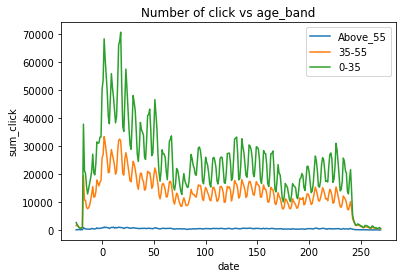

In [15]:
Above_55= demo_click.loc[demo_click['age_band'] == '55<=']
From_35_to_55 = demo_click.loc[demo_click['age_band'] == '35-55']
From_0_to_35 = demo_click.loc[demo_click['age_band'] == '0-35']

Above_55.groupby('date')['sum_click'].count().plot(kind="line")
From_35_to_55.groupby('date')['sum_click'].count().plot(kind='line')
From_0_to_35.groupby('date')['sum_click'].count().plot(kind='line')

plt.xlabel('date')
plt.ylabel('sum_click')
plt.title('Number of click vs age_band')
plt.legend(['Above_55', '35-55','0-35'])
#plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## Num of click vs num_of_prev_attempts

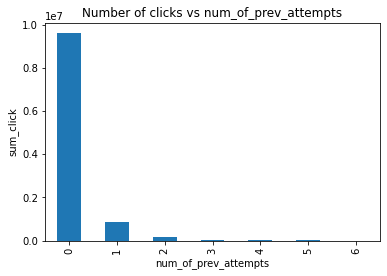

In [16]:
demo_click.groupby('num_of_prev_attempts')['sum_click'].count().plot(kind="bar")
plt.xlabel('num_of_prev_attempts')
plt.ylabel('sum_click')
plt.title('Number of clicks vs num_of_prev_attempts')
plt.show()

## Num of click vs num_of_prev_attempts

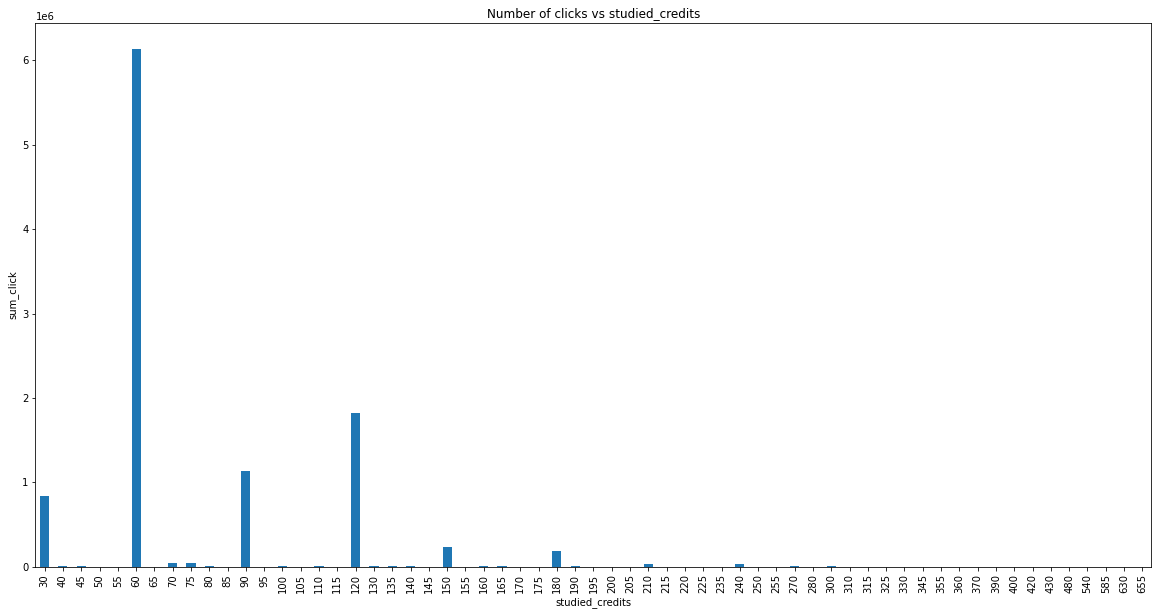

In [29]:
demo_click.groupby('studied_credits')['sum_click'].count().plot(kind="bar")
plt.xlabel('studied_credits')
plt.ylabel('sum_click')
plt.title('Number of clicks vs studied_credits')
plt.rcParams["figure.figsize"] = (5,10)
plt.show()

## No of click vs disability

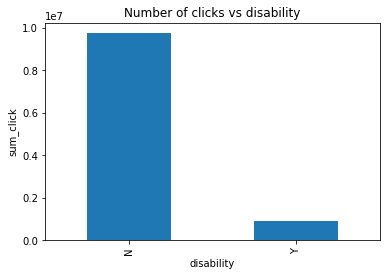

In [17]:
demo_click.groupby('disability')['sum_click'].count().plot(kind="bar")
plt.xlabel('disability')
plt.ylabel('sum_click')
plt.title('Number of clicks vs disability')
plt.show()

## number of click vs final_result

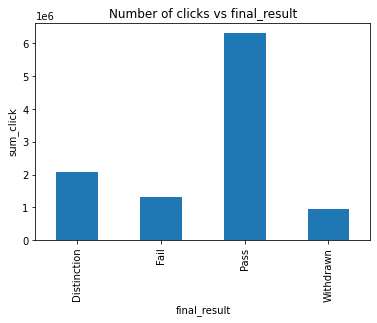

In [18]:
demo_click.groupby('final_result')['sum_click'].count().plot(kind="bar")
plt.xlabel('final_result')
plt.ylabel('sum_click')
plt.title('Number of clicks vs final_result')
plt.show()

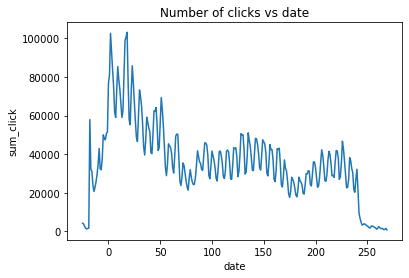

In [19]:
demo_click.groupby('date')['sum_click'].count().plot(kind="line")
plt.xlabel('date')
plt.ylabel('sum_click')
plt.title('Number of clicks vs date')
plt.show()